# Python Tutorial: Beginning Charts in Pandas
### 30+ Minute Introduction

Prerequsities:
* Pyhton Tutorial - Getting Started with Data Analytics

Learning Objectives:
* Convert pandas data into a chart
* Some comfort in customizing charts

Activities:
* Load data: Lexington Residential Assessed Values
* Make scatter chart
* Use builtin histogram function
* Make custom histogram horizontal bar chart
  * Make figure size large enough to be visible
  * Remove outliers from the data
  * Set title, x-axis, y-axis and fonts for these
  * Label bars within the chart
  * Put dollar signs for y-axis values


Source of data: download excel spreadsheet from here:
* https://bitbucket.org/extrospect/python_tutorials/src/master/, filename: Lexington DOR FY2019 Residential Approved Values Assessor Assessment.xlsx
Alternatively:
* https://docs.google.com/spreadsheets/d/1UdIe6qsIdgfsFcIpN2SS7X5Iq1orH1dtEGv2kgwBulE/edit?usp=sharing
 

## Charting with Pandas - Overview

* Matplotlib is the typical plotting library for python
* Pandas provides plot functions which "wrap" matplotlib functions
  * There is for example a matplotlib histogram function distinct from pandas histogram function
  * Generally its fastest to use the pandas function with a DataFrame and reference the matplotlib function only as needed
* Matplotlib can be used direclty for advanced functionality

## Load spreadsheet into dataframe and verify load (5')

* 1A. Call read_excel() and store result in dataframe.  (pandas.read_excel is much like pandas.read_csv().)

Notes about using filenames in python:

* Option 1: Put the file in the same directory as the notebook, and then you do not have the path

* Option 2: Refer to a file by it's whole path

    **Windows** example: "e:\\\\dir_name\\\\filename.csv'.  
    Note: one must use \\\\ for each \ in a Windows path 
    
    **MacOS/Linux** example: "/dir_name/filename.csv'

* Option 3: With module os, Use os.path.join() to concatenate parts of a file path together:

    filename = **os.path.join**('e:', 'dir_name', 'filename.csv') will create a string e:\\dir_name\\filename.csv on Windows and e:/dir_name/filename.csv on a Mac.


In [1]:
import os
import pandas as pd

# your code here: replace filename if needed per options above
filename = 'Lexington DOR FY2019 Residential Approved Values Assessor Assessment.xlsx'
assess_df = pd.read_excel(filename)

* Use info() to summarize dataframe.  Data types from info():
  * float (or float64): has fractional parts or int with NULL values.
  * int (or int64): integer without fractional parts.  Does not permit NULL values.  
  * object: "catch all" for strings and other fields not directly identified as int or float

* We will be analyzing the field "Total Assessed Parcel Value".  Check that this field is type ***int64*** (or int32) from info()
  * If the data is not type int or float, you will need to figure out why before moving on.


In [ ]:
# run this
assess_df.info()

* Use describe() on the "Total Assessed Parcel Value" for summary statistics

  * Note: When a column name has a space one typically needs to refer to it as assess_df["column name"]  because assess_df.column name will not work due to the space


In [ ]:
# run this code
assess_df["Total Assessed Parcel Value"].describe()

## Make scatter plot of data

In [ ]:
# run this
assess_df.plot.scatter('Num Bedrm', 'Num Baths', figsize=(8,8))

In [ ]:
# run this
reasonable_bedrooms = assess_df[assess_df['Num Bedrm']<20]
reasonable_bedrooms.plot.scatter('Num Bedrm', 'Num Baths', figsize=(12,12))

## We would like to have the size be the number of observations.

* Need to group by and count to have that variable

In [ ]:
# run this
# this does group by which creates a series, but then converts into a dataframe and with reset_index() will create an arbitrary index and make all other fields columns
br_counts = reasonable_bedrooms.groupby(['Num Bedrm', 'Num Baths']).Location.count().to_frame().reset_index()
print(br_counts.head(10))
# we want the field to be called total_count rather than Location
br_counts.rename(columns={'Location': 'total_count'}, inplace=True)
br_counts.head(10)

In [ ]:
br_counts.plot.scatter('Num Bedrm', 'Num Baths', s=br_counts.total_count, figsize=(8,8))

## Remove from the data set rows which have only a single instance as these may be bad data.  Then replot

In [ ]:
# your code here



## Scale the size variable (s) in scatter plot by dividing by a number so the circles are larger or smaller as you wish

In [ ]:
# your code here



## Make a simple histogram of the data (5')

**Starting with the dataframe from prior step:**
* Pandas has a hist() function.  You will need to call it on a **column** within the dataframe to make a simple histogram
* Vary the number of bins in the hist() call and see what happens

Documentation for hist: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

In [ ]:
# run code
%matplotlib inline  
import matplotlib.pyplot as plt
# magic %matplotlib command required for use in jupyter notebooks
# import statement allows us to refer to matplotlib as plt going forward

assess_df['Total Assessed Parcel Value'].plot.hist(bins=40)

## Histogram looks terrible because a few high values distort the entire histogram

* Subset the dataframe to those with values below 3000000

In [ ]:
# run code.  vary bins
small_df = assess_df[assess_df['Total Assessed Parcel Value'] < 3000000].copy()
small_df['Total Assessed Parcel Value'].plot.hist()

## Use value_counts() to make a summary dataframe (10')

**We want to make our own histogram data**.  We will do this by creating a new column for each home showing which 50,000 "bin" it is located in.  Examples:
-  home valued at  74,000 ->  50,000 bin
-  home valued at 125,000 -> 100,000 bin
-  home valued at 160,000 -> 150,000 bin


* 3A. Select a column from a dataframe.
  * Below we will assign it to a variable, you do not have to do that yet.


In [ ]:
small_df['hist_bin'] = (small_df['Total Assessed Parcel Value'] / 50000).astype('int32')*50000
small_df.hist_bin.describe()

In [ ]:
# histogram looks quite similar, although under the covers the values are quite different
small_df.hist_bin.plot.hist()

### Use the new column to create a DataFrame we will use for charting
* Call value_counts() on the column you have created to see how many instances of each bin value
* Assign result of value_counts() to a variable.  
* Apply type() to this variable to discover type of the new variable.



In [ ]:
# run code
vc = small_df.hist_bin.value_counts()
print(f'Type of value counts is: {type(vc)}')
print('Most frequent data (sorted by frequency:')
print(vc.head(10))

In [ ]:
# Sorting resulting variable will give us something better for plotting
vc_sorted = vc.sort_index()
vc_sorted.head(10)

## Use pandas barh to make your own horizontal bar chart (5')

With the new dataframe created in the prior step:
* 4A. Make a horizontal bar chart with this new dataframe (pandas has a barh() function.)

Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html

In [ ]:
# run code
vc_sorted.plot.barh()

## Make chart pretty (10')

**Enhancing the chart from the prior step:**
* Increase figure size (8in x 6in).  (figsize parameter to barh)
* Set title 


Note: there are plt functions like plt.title(), plt.ylabel() and plt.xlabel().  But the pandas function might take these arguments directly.

In [ ]:
# a font dictionary which may be helpful to you when setting labels and titles
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# your code





* Set x-axis label (# of properties), be sure to make large enough to read (plt.xlabel())
* Set y-axis label (assessed value) (plt.ylabel())

In [ ]:
# your code



* Remove properties valued at over 2 million (outliers which distort the chart)

You might do this by slicing the data before plotting it

But you probably have a Series and should make it a DataFrame first so it's easy to slice on the values of the dataframe.

In [ ]:
# your code 



## Patches

## Label bars in the charts (10')

**Further enhancing the chart**:
* Graphic items such as bars are known in matplotlib as "patches"
* You can iterate over the patches
* 1. Get the patches from the axes object
* 2. Get the width of the patch to have the size of the bar
* 3. Use ax.annotate with info on the patch location to place your annotation and the value of the patch width converted to string as the label for the bar.
* plt.show() shows the plot when done
* https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html
* https://matplotlib.org/api/patches_api.html


In [ ]:
# the barh function returns an axes object which we need to get the patches
ax = vc_sorted.plot.barh()

# iterate through patches in the axes object and print out the patches to see what they are
for p in ax.patches:
    print(p)
    


### Add annotation for the patches

* For each patch write the number equal to the size of the value
* Annotation requires a location, which can be derived from the xy of the patch rectangle (printed in prior cell as example)
* The width of the patch tells us the nubmer we wnat to print next to the patch
* Remember to make the figure size large enough to read these bars and data

In [ ]:
# Modify code below

# the barh function returns an axes object which we need to get the patches
ax = vc_sorted.plot.barh()

# iterate through patches in the axes object and print out the patches to see what they are
for p in ax.patches:
    p.annotate(......)

## Ticklabels

## Put dollar signs on y-axis labels (10')

**And further work on the chart:**
* You may want to use these functions:
* ax = plt.gca()
* yaxis.get_majorticklabels()
* ax.set_yticklabels(new_labels)
* https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

In [ ]:
# your code

# Basically you need to get the tick labels as a list and then create a new list like the old list with the dollar signs, and then set that back as the tick labels





## Save the chart to disk

* Hint: savefig()

In [ ]:
# your code





## Sample Resulting Chart

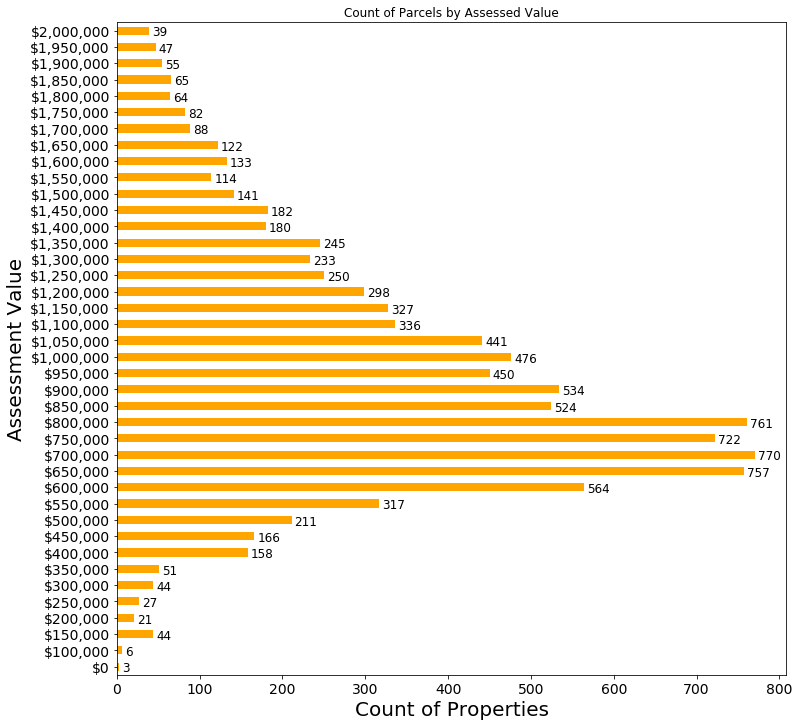

# Further Learning Topics

## Subplots

* Subplots allow one to do more than one plot at the same time
* Example from: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html

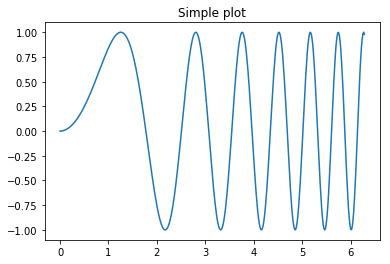

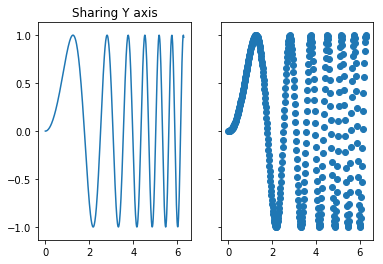

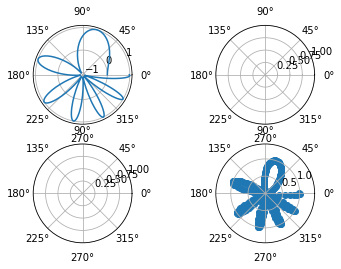

In [28]:
import numpy as np

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

## Advanced Activities

* Below is some sample code relating to scatter plots, but we'll revisit this in a later session.

## Code for Plotting Labels on Scatterplot without Overlapping Labels

In [ ]:
class NonOverlapTextPlotter:
    
    def __init__(self, ylims, txt_width, txt_height, xadj, yadj, testing=False):
        """
        ylims: y values for iterating range
        txt_width: width of text char
        txt_height: height of text char
        xadj: default adjustment to x label position
        yadj: default adjustment to y label position
        """
        
        # list to which positions will be added
        self.plot_points = []
        # configuration
        self.ylims = ylims
        self.txt_width = txt_width
        self.txt_height = txt_height
        self.testing = testing
        self.xadj = xadj
        self.yadj = yadj
        
        
    def add_position(self, x, y, text):
        """
        add_position: defines one position to plot later
        """
        label_y_adj = 0.0  # in case it is the first piont
        # Check for collision with earlier points
        for label_y_adj in np.arange(0.0, self.ylims[1] - y, (self.ylims[1]-self.ylims[0])/50.0):
            collision = False
            if label_y_adj > 0.0:
                if self.testing:
                    print(f'Trying label_y_adj {label_y_adj}')
            for ix, iy, ilabel_x, ilabel_y, itext in self.plot_points:
                # find a label_y_adj which will work
                if (y + label_y_adj < ilabel_y + self.txt_height) and (y + self.txt_height + label_y_adj > ilabel_y):
                    # vertical collision possible
                    if (x < ilabel_x + self.txt_width * len(itext)) and (x + self.txt_width * len(text) > ilabel_x):
                        # horizontal collision occurring
                        collision = True
                        if self.testing:
                            print(f'Collision found between {x}, {y+label_y_adj}, {text} and {ix}, {iy}, {itext}')
                        break
            if not collision:
                # no collision with any of points we can break out of the label_y_adj loop
                break
        # record point for later plotting
        if label_y_adj != 0.0:
            if self.testing:
                print(f'Adjusting {y} to {y+label_y_adj}')
        self.plot_points.append([x, y, x, y + label_y_adj, text])
        
        
    def text_plotter(self, axes):
        """
        text_plotter: plots all points in self.plot_points while respecting spacing
        """
        for ix, iy, ilabel_x, ilabel_y, itext in self.plot_points:
            axes.text(ilabel_x + self.xadj, ilabel_y + self.yadj, itext)
            if (ilabel_y != iy) or (ilabel_x != ix):
                # adjusted position requiring label
                if self.testing:
                    print(f'Adding arrow from {iy} to {ilabel_y}')
                axes.arrow(ilabel_x+ self.xadj, ilabel_y+ self.yadj, -self.xadj, iy-ilabel_y-self.yadj, color='blue', alpha=0.2, width=self.txt_width*.08,
                           head_width=self.txt_width*.5, head_length=self.txt_height*0.8,
                           zorder=0,length_includes_head=True)



In [ ]:
# Code snippet from actual use:


# This code would be in context of adding a chart

pp = NonOverlapTextPlotter(ax.get_ylim(), txt_width, txt_height, .002, 2, testing=False)

for index, row in responses.iterrows():
    #_ = ax.text(row.offer_response_pct+.02, row.SalesUSD_net_keycode-.3, s=field_formatter % row[field])
    _ = pp.add_position(row.offer_response_pct, row.SalesUSD_net_keycode, field_formatter % row[field])

# need to add text_plotter back in
_ = pp.text_plotter(ax)
